# Case Study: Fashion Class Classification

We will be using the Fashion MNIST Data for this project

- We have 70,000 datapoints of Clothing.
- 60,000 observations are in Training file.
- 10,000 observations in Test file.
- 10 Classes: 
    - 0: T-Shirt
    - 1: Trouser
    - 2: Pullover 
    - 3: Dress 
    - 4: Coat
    - 5: Sandal
    - 6: Shirt
    - 7: Sneaker
    - 8: Bag
    - 9: Ankle Boot
    
- We have images of 28x28 pixels in height and width respectively.
- Images are in grayscale: 0 being Black and 255 being White.
    

# Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [21]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# Data Exploration and Visualisation

In [22]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
fashion_train_df.shape

(60000, 785)

In [26]:
fashion_test_df.shape

(10000, 785)

In [27]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype = 'float32')

4.0

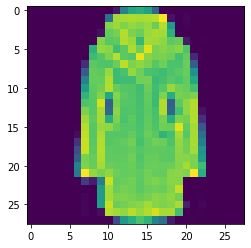

In [45]:
import random
rand_num = random.randint(1, 60000)
label = train[rand_num, 0]
plt.imshow(train[rand_num, 1:].reshape(28,28))
label

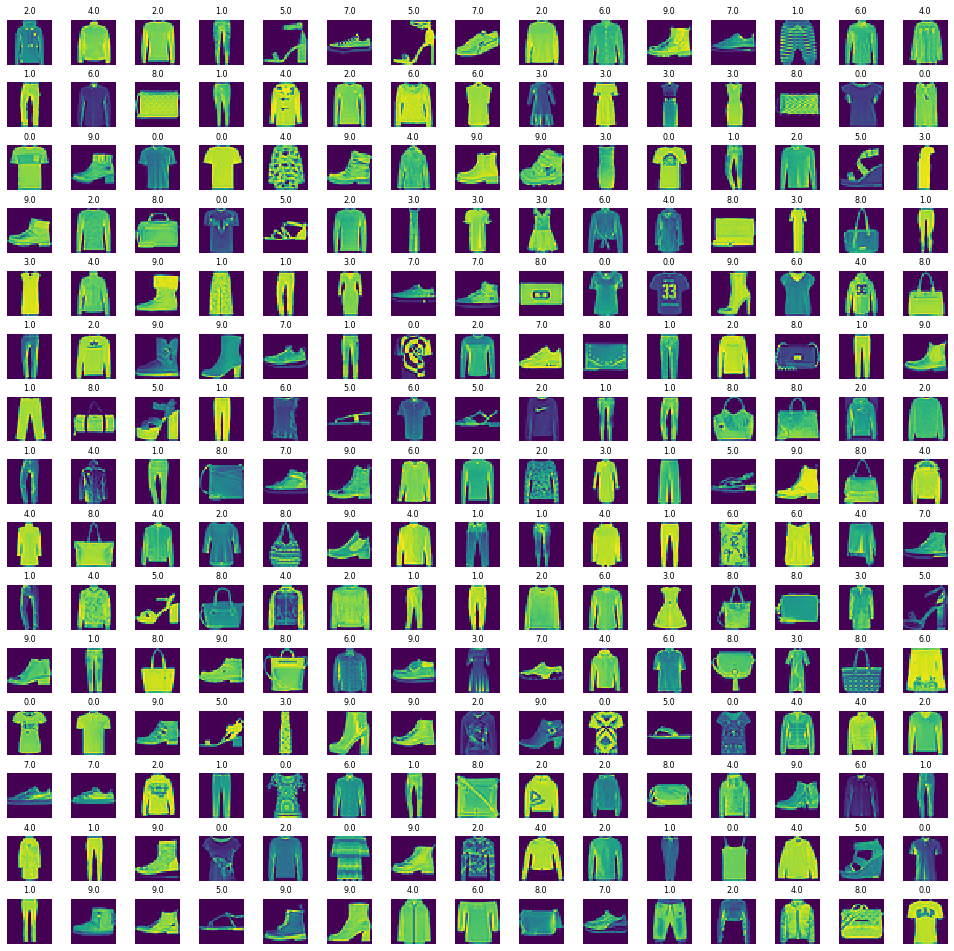

In [47]:
#Viewing Imagies in a grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(W_grid, L_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(train)

for i in np.arange(0, W_grid * L_grid): #creating evenly spaced variables
    index = np.random.randint(0, n_training)
    axes[i].imshow(train[index, 1:].reshape((28, 28)))
    axes[i].set_title(train[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Training the Model

In [51]:
#Training Split
X_train = train[:, 1:]/255 
y_train = train[:, 0]

In [53]:
#Testing Split
X_test = test[:, 1:]/255
y_test = test[:, 0]

### Validation

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [61]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [66]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


### Training the Model

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [72]:
cnn_model = Sequential()

In [73]:
#A Convolutional layer of 32 Kernels, size 3x3
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [76]:
#A Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [77]:
#Flatten our model for the NN
cnn_model.add(Flatten())

In [79]:
#Dense Layer
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
#Compiling our Network
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [82]:
epochs = 40

In [84]:
cnn_model.fit(X_train,
              y_train,
              batch_size = 512,
              nb_epoch = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 9s 180us/step - loss: 1.0301 - accuracy: 0.6225 - val_loss: 0.5508 - val_accuracy: 0.8058
Epoch 2/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.4975 - accuracy: 0.8262 - val_loss: 0.4625 - val_accuracy: 0.8364
Epoch 3/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.4365 - accuracy: 0.8474 - val_loss: 0.4201 - val_accuracy: 0.8513
Epoch 4/100
48000/48000 [==============================] - 8s 177us/step - loss: 0.3984 - accuracy: 0.8618 - val_loss: 0.3915 - val_accuracy: 0.8669
Epoch 5/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.3734 - accuracy: 0.8704 - val_loss: 0.3636 - val_accuracy: 0.8708
Epoch 6/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.3557 - accuracy: 0.8767 - val_loss: 0.3575 - val_accuracy: 0.8768
Epoch 7/100
48000/48000 [==============================]

48000/48000 [==============================] - 8s 177us/step - loss: 0.1150 - accuracy: 0.9606 - val_loss: 0.2820 - val_accuracy: 0.9119
Epoch 56/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.1081 - accuracy: 0.9634 - val_loss: 0.2925 - val_accuracy: 0.9101
Epoch 57/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.1060 - accuracy: 0.9643 - val_loss: 0.3035 - val_accuracy: 0.9056
Epoch 58/100
48000/48000 [==============================] - 9s 177us/step - loss: 0.1091 - accuracy: 0.9621 - val_loss: 0.2972 - val_accuracy: 0.9098
Epoch 59/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.0999 - accuracy: 0.9666 - val_loss: 0.2947 - val_accuracy: 0.9117
Epoch 60/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.0998 - accuracy: 0.9663 - val_loss: 0.2959 - val_accuracy: 0.9103
Epoch 61/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0958 - accuracy: 0.9681 - val

# Evaluating the Model

In [87]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}".format(evaluation[1]))

10000/10000 [==============================] - 1s 140us/step
Accuracy: 0.91


In [89]:
predicted_classes = cnn_model.predict_classes(X_test)

In [90]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

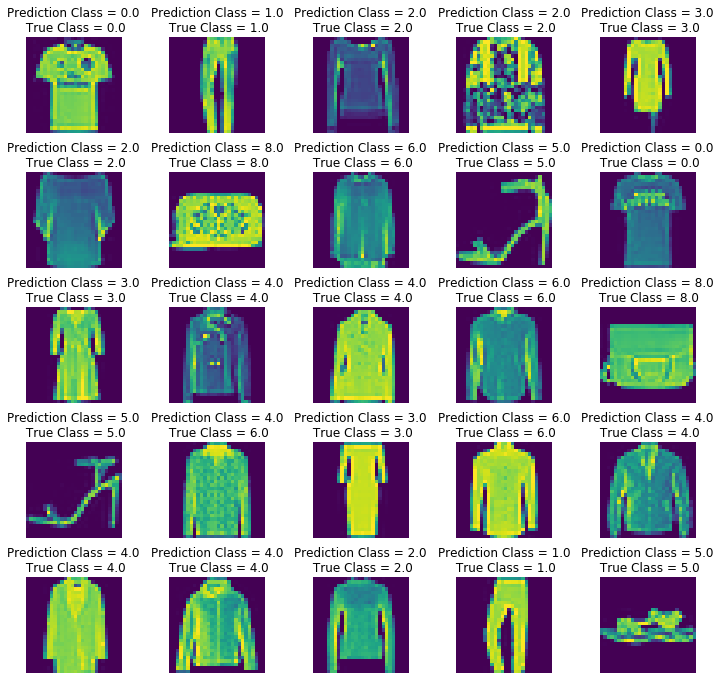

In [93]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace = 0.5)

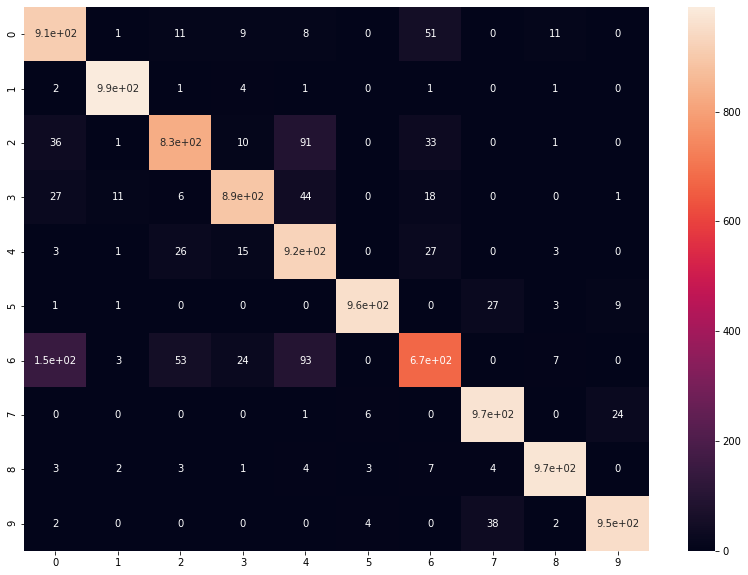

In [95]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(con_matrix, annot = True)

In [96]:
#Classification Report
from sklearn.metrics import classification_report

no_classes = 10
target_names = ["Class {}".format(i) for i in range(no_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.91      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.89      0.83      0.86      1000
     Class 3       0.93      0.89      0.91      1000
     Class 4       0.79      0.93      0.85      1000
     Class 5       0.99      0.96      0.97      1000
     Class 6       0.83      0.67      0.74      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Improving The Model

- Improve the accuracy by adding more feature detectors or adding a dropout
- Dropout: Dropping out units in a Neural Network
- Neurons can develop co-dependency amongst each other during training
- Dropout is a regularization technique for reducing overfitting.
- It enables training to occur on several architectures of the neural network